In [49]:
import pathlib
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
import keras
import tensorflow
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

black grass sample size :  309 

Charlock sample size :  452 

Cleavers sample size :  335 

Common Chickweed sample size :  713 

Common wheat sample size :  253 

Scentless Mayweed sample size :  607 

Fat Hen sample size :  538 

Loose Silky sample size :  762 

Maize sample size :  257 

Shepherds Purse sample size :  274 

Small flowered Cranesbill sample size :  576 

Sugar_beet sample size :  463 



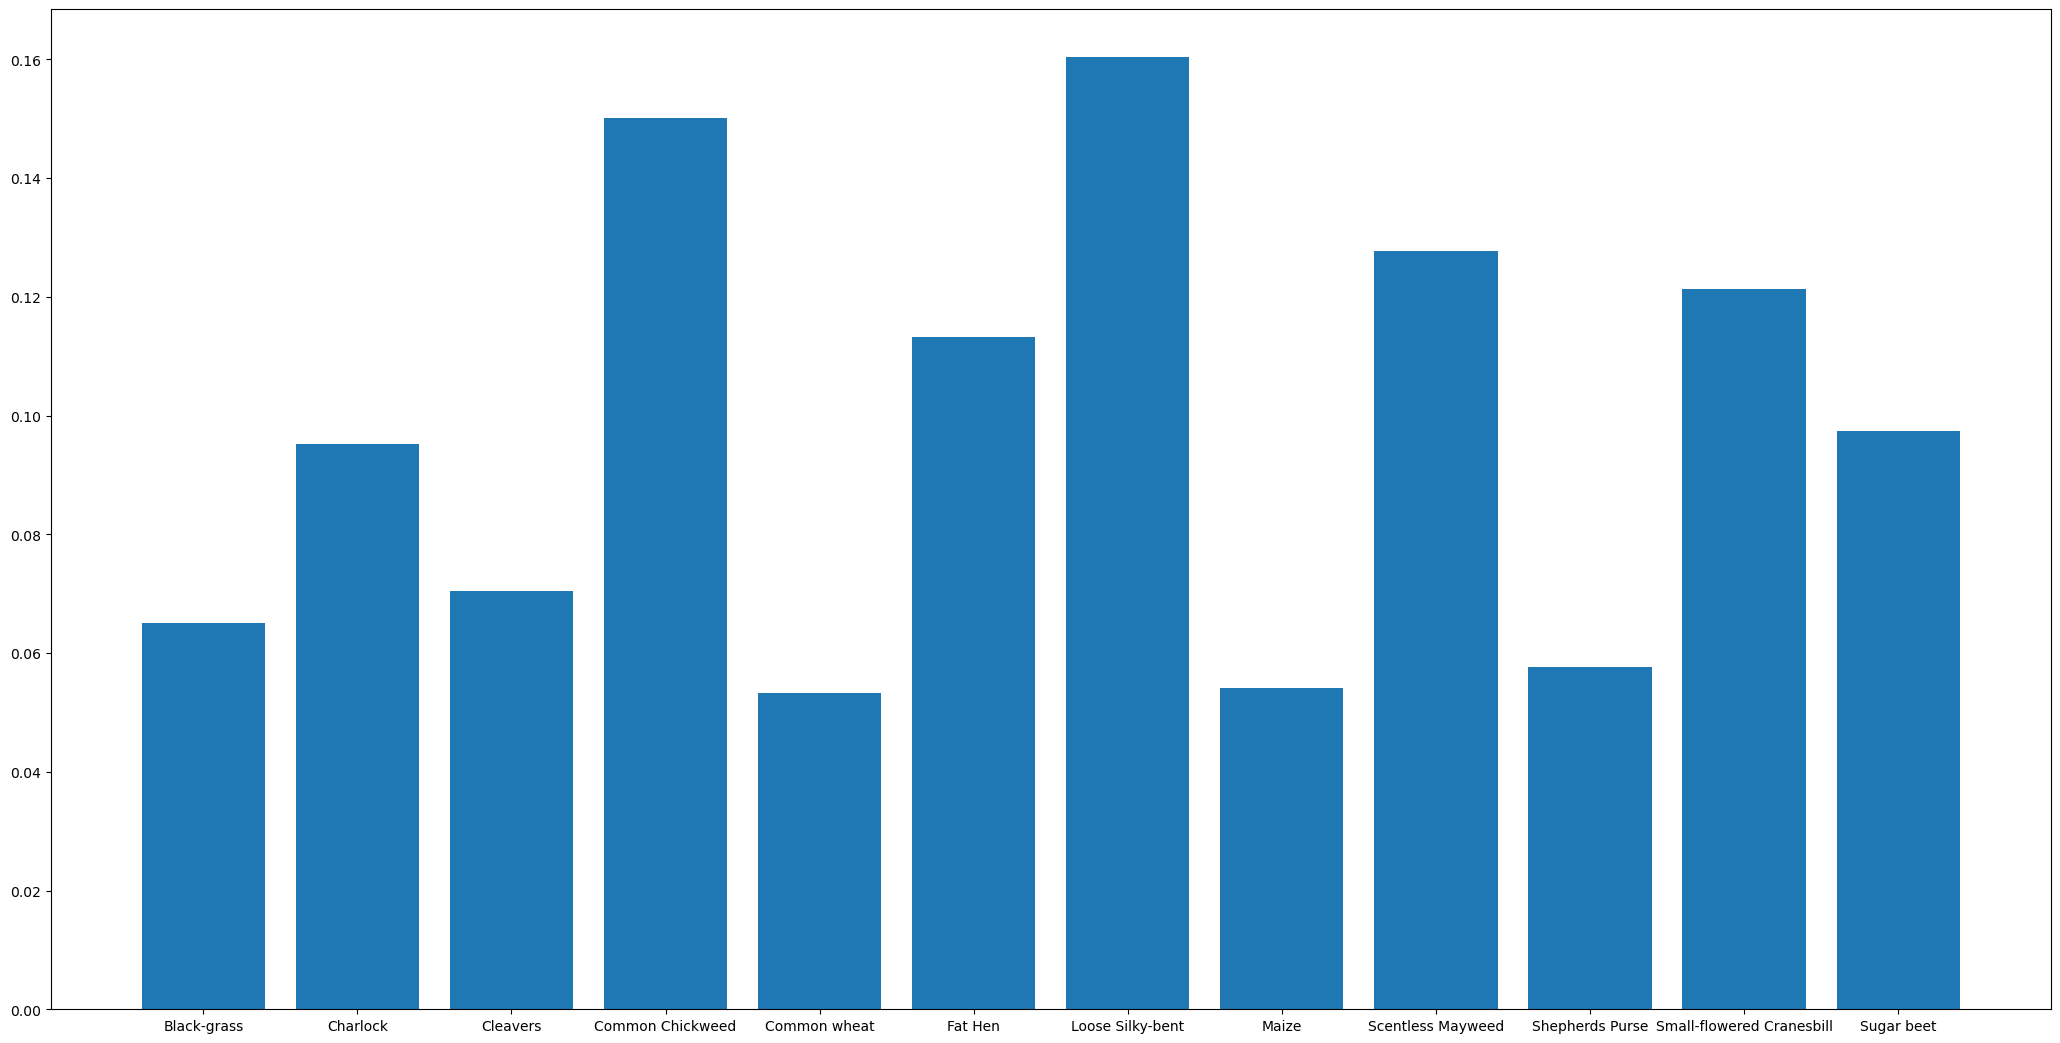

In [50]:
training_images_files_names_black_grass = len(os.listdir("../Plant_Seedling_Classification/Images/Black-grass/"))
training_images_files_names_Charlock = len(os.listdir("../Plant_Seedling_Classification/Images/Charlock"))
training_images_files_names_Cleavers = len(os.listdir("../Plant_Seedling_Classification/Images/Cleavers"))
training_images_files_names_Common_Chickweed = len(os.listdir("../Plant_Seedling_Classification/Images/Common Chickweed"))
training_images_files_names_Common_wheat = len(os.listdir("../Plant_Seedling_Classification/Images/Common wheat"))
training_images_files_names_Scentless_Mayweed = len(os.listdir("../Plant_Seedling_Classification/Images/Scentless Mayweed"))
training_images_files_names_Fat_Hen = len(os.listdir("../Plant_Seedling_Classification/Images/Fat Hen"))
training_images_files_names_Loose_Silky_bent = len(os.listdir("../Plant_Seedling_Classification/Images/Loose Silky-bent"))
training_images_files_names_Maize = len(os.listdir("../Plant_Seedling_Classification/Images/Maize"))
training_images_files_names_Shepherds_Purse = len(os.listdir("../Plant_Seedling_Classification/Images/Shepherd’s Purse/"))
training_images_files_names_Small_flowered_Cranesbill = len(os.listdir("../Plant_Seedling_Classification/Images/Small-flowered Cranesbill"))
training_images_files_names_Sugar_beet = len(os.listdir("../Plant_Seedling_Classification/Images/Sugar beet"))
print("black grass sample size : ",training_images_files_names_black_grass,"\n")
print("Charlock sample size : ",training_images_files_names_Charlock,"\n")
print("Cleavers sample size : ",training_images_files_names_Cleavers,"\n")
print("Common Chickweed sample size : ",training_images_files_names_Common_Chickweed,"\n")
print("Common wheat sample size : ",training_images_files_names_Common_wheat,"\n")
print("Scentless Mayweed sample size : ",training_images_files_names_Scentless_Mayweed,"\n")
print("Fat Hen sample size : ",training_images_files_names_Fat_Hen,"\n")
print("Loose Silky sample size : ",training_images_files_names_Loose_Silky_bent,"\n")
print("Maize sample size : ",training_images_files_names_Maize,"\n")
print("Shepherds Purse sample size : ",training_images_files_names_Shepherds_Purse,"\n")
print("Small flowered Cranesbill sample size : ",training_images_files_names_Small_flowered_Cranesbill,"\n")
print("Sugar_beet sample size : ",training_images_files_names_Sugar_beet,"\n")
occurences = [training_images_files_names_black_grass/4750,training_images_files_names_Charlock/4750,training_images_files_names_Cleavers/4750,training_images_files_names_Common_Chickweed/4750,training_images_files_names_Common_wheat/4750,training_images_files_names_Fat_Hen/4750,training_images_files_names_Loose_Silky_bent/4750,training_images_files_names_Maize/4750,training_images_files_names_Scentless_Mayweed/4750,training_images_files_names_Shepherds_Purse/4750,training_images_files_names_Small_flowered_Cranesbill/4750,training_images_files_names_Sugar_beet/4750]
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"],occurences)
plt.show()

plant species : Cleavers


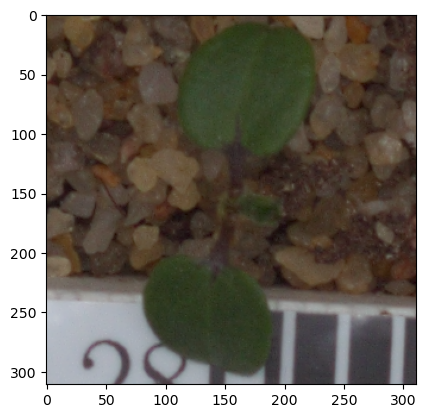

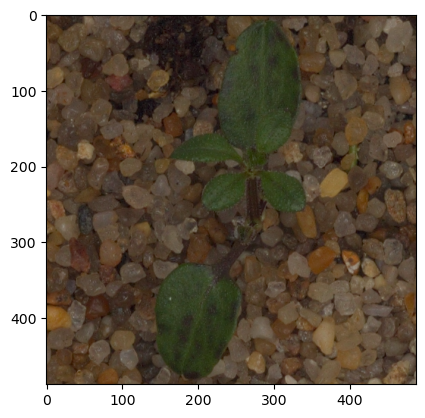

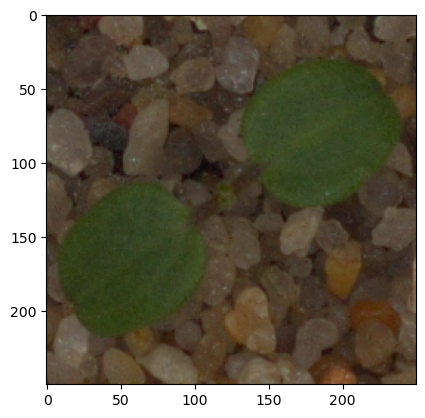

plant species : Common Chickweed


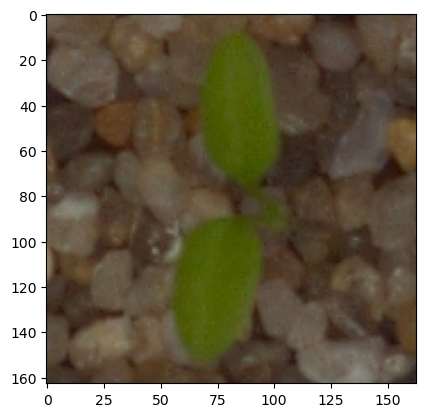

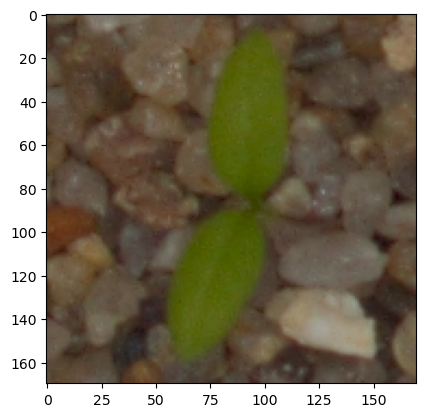

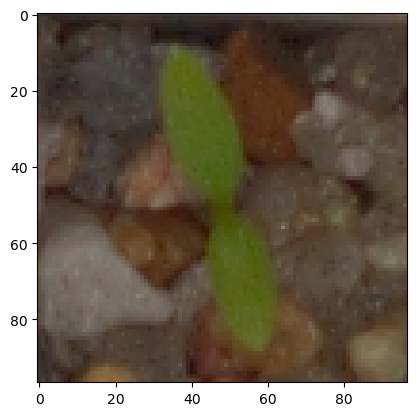

plant species : Small-flowered Cranesbill


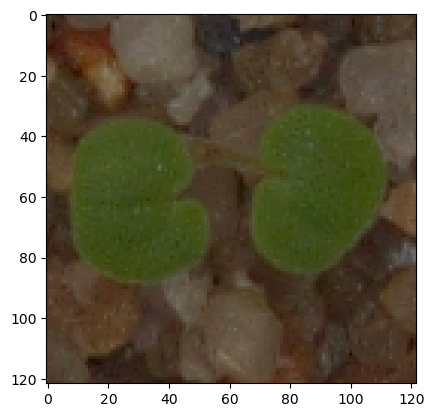

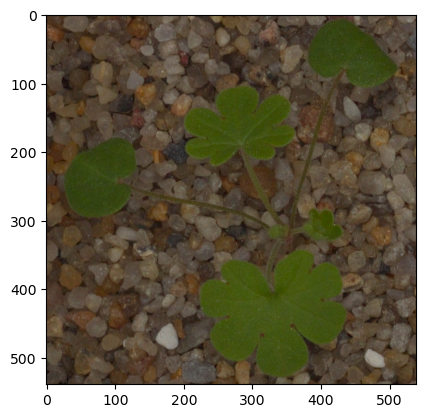

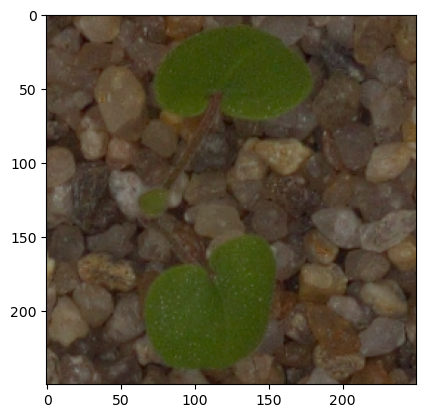

plant species : Black-grass


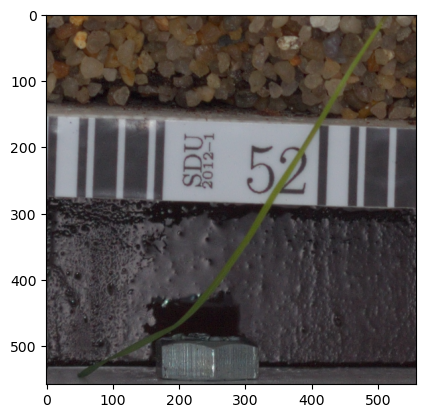

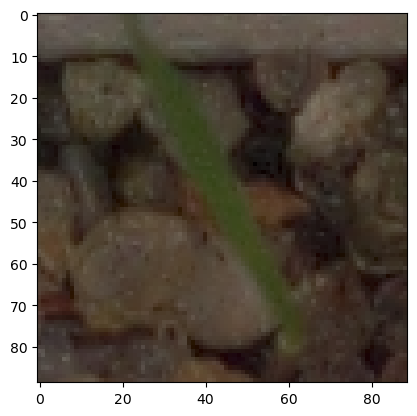

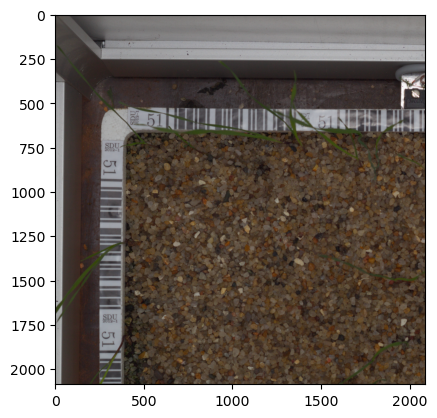

plant species : Loose Silky-bent


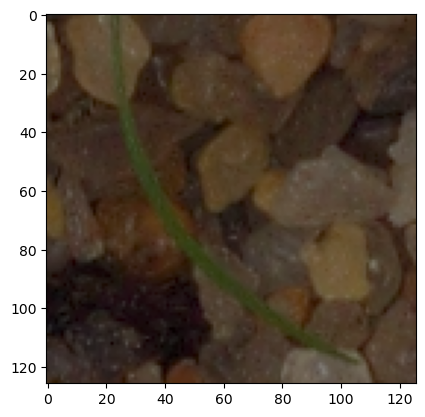

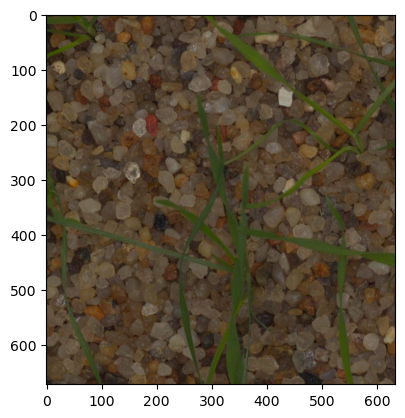

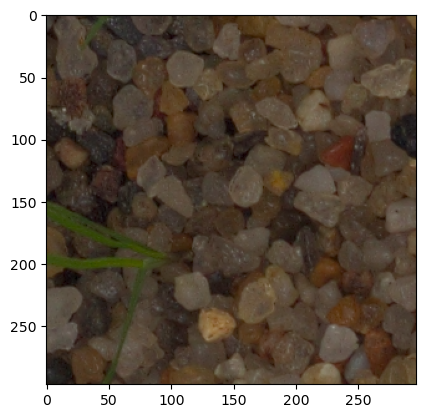

plant species : Scentless Mayweed


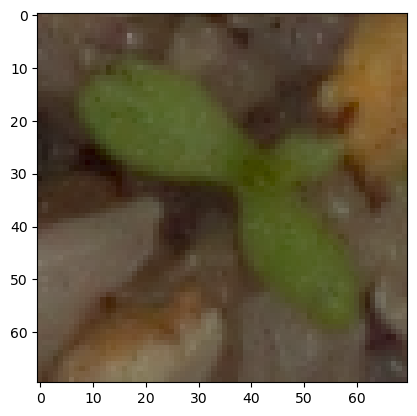

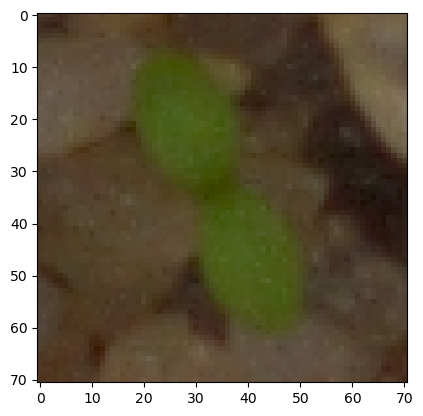

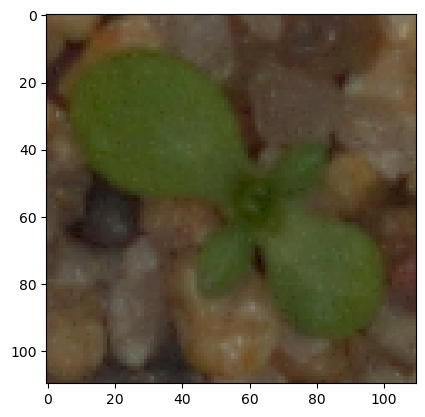

plant species : Sugar beet


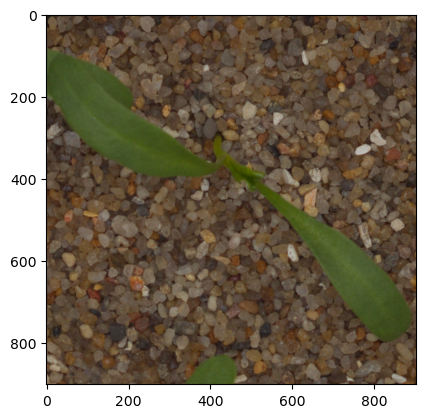

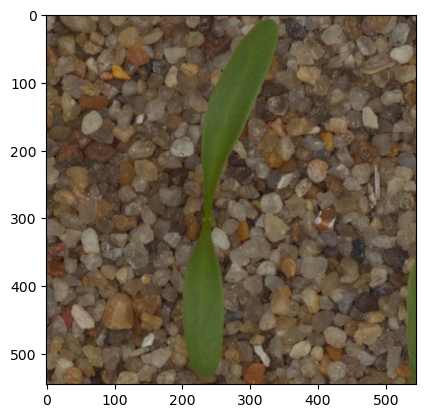

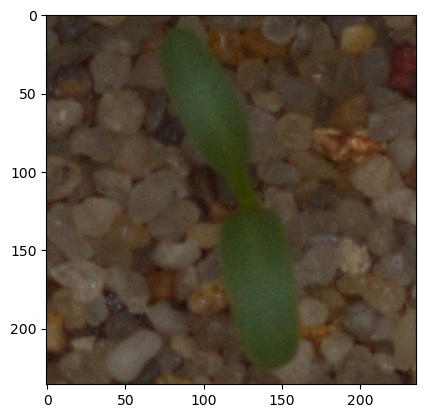

plant species : Shepherd’s Purse


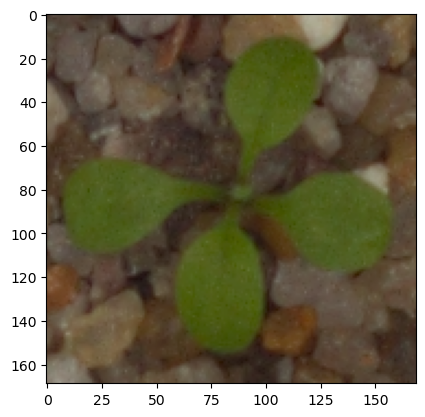

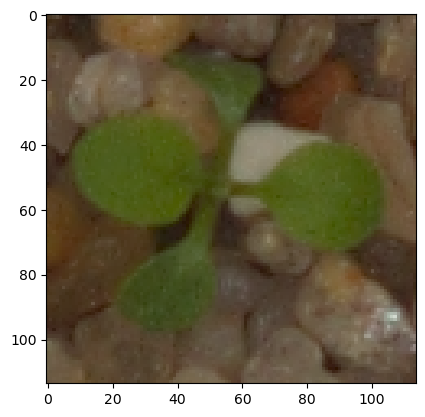

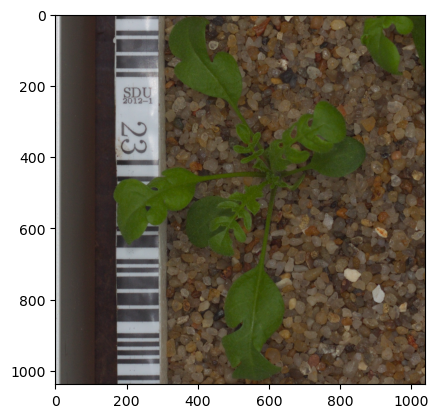

plant species : Charlock


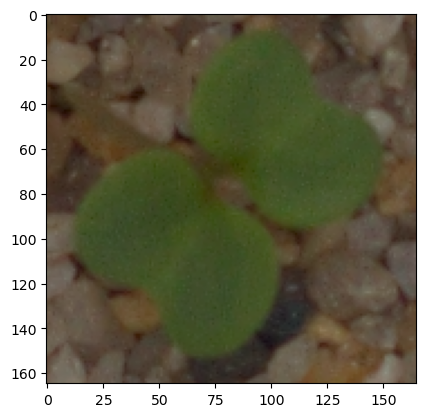

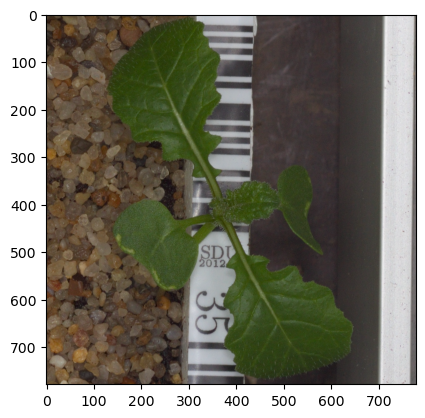

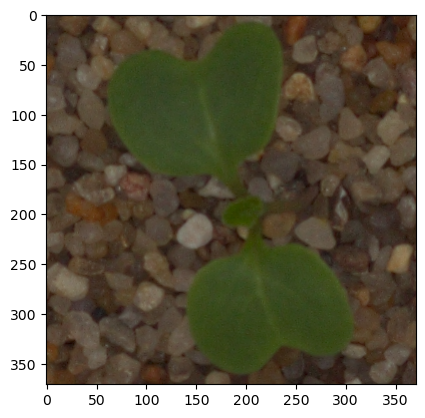

plant species : Maize


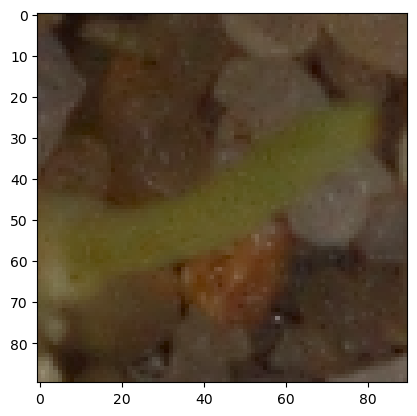

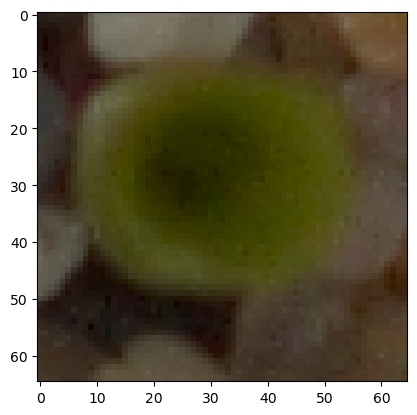

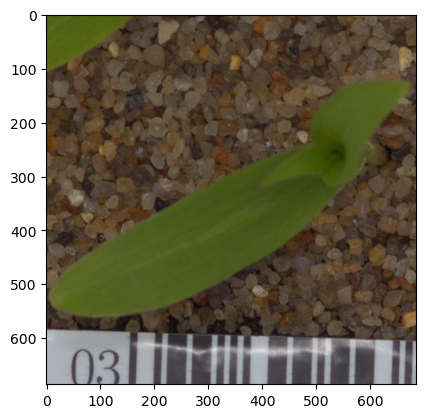

plant species : Common wheat


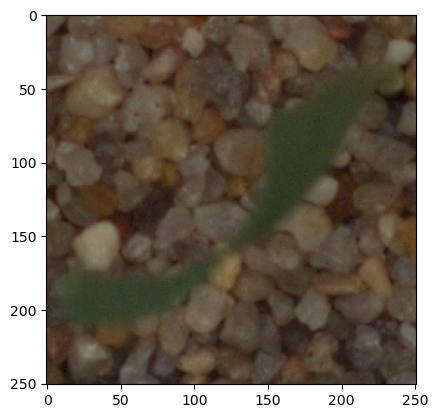

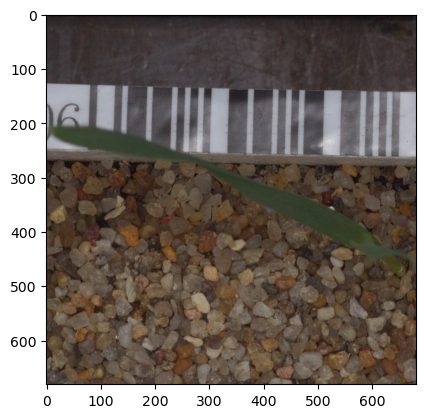

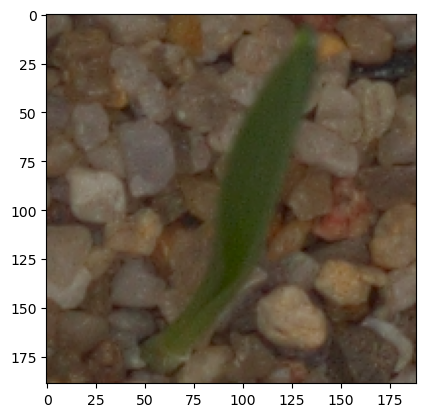

plant species : Fat Hen


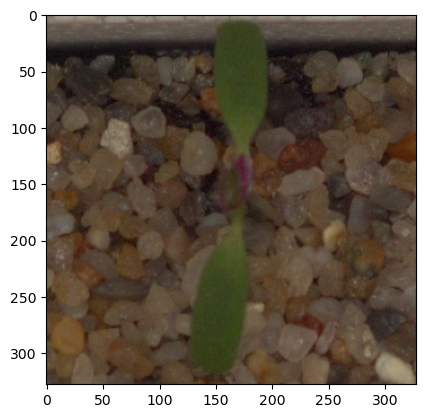

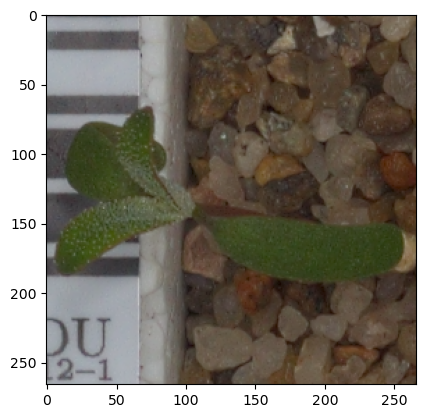

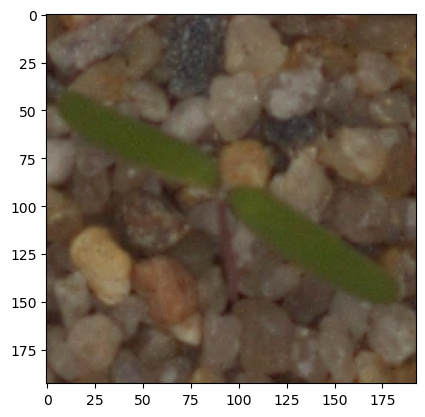

In [51]:
plant_species = os.listdir("../Plant_Seedling_Classification/Images")
for plant_specie in plant_species:
   images_file_name = os.listdir("../Plant_Seedling_Classification/Images/"+plant_specie)
   sample_size_to_display = random.sample(range(0,100), 3)
   if plant_specie == ".ipynb_checkpoints":
     continue
   print("plant species :",plant_specie)
   for i in range(0,3): 
     img = cv2.imread("../Plant_Seedling_Classification/Images/"+plant_specie+"/"+images_file_name[sample_size_to_display[i]], cv2.IMREAD_COLOR)
     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
     plt.imshow(img)
     plt.show()

In [52]:
def get_files_from_folder(path):

    files = os.listdir(path)
    return np.asarray(files)

In [53]:
url = '../Plant_Seedling_Classification/Images'
get_files_from_folder(url)

array(['Cleavers', 'Common Chickweed', 'Small-flowered Cranesbill',
       'Black-grass', 'Loose Silky-bent', 'Scentless Mayweed',
       'Sugar beet', 'Shepherd’s Purse', 'Charlock', 'Maize',
       'Common wheat', 'Fat Hen'], dtype='<U25')

In [54]:
batch_size = 32
img_height = 120
img_width = 120
data_dir_train = '../Plant_Seedling_Classification/Images'

In [55]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="training", seed=123,
                                                               image_size=(img_height, img_width), batch_size=batch_size)

Found 5539 files belonging to 12 classes.
Using 4432 files for training.


In [57]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="validation", seed=123,
                                                             image_size=(img_height, img_width), batch_size=batch_size)

Found 5539 files belonging to 12 classes.
Using 1107 files for validation.


In [58]:
labels = sorted(os.listdir(data_dir_train))
count_plot = []
for i in labels:
    count_plot.append(len(os.listdir(os.path.join(data_dir_train,i))))

In [59]:
count_plot

[309, 452, 335, 713, 253, 538, 762, 257, 607, 274, 576, 463]

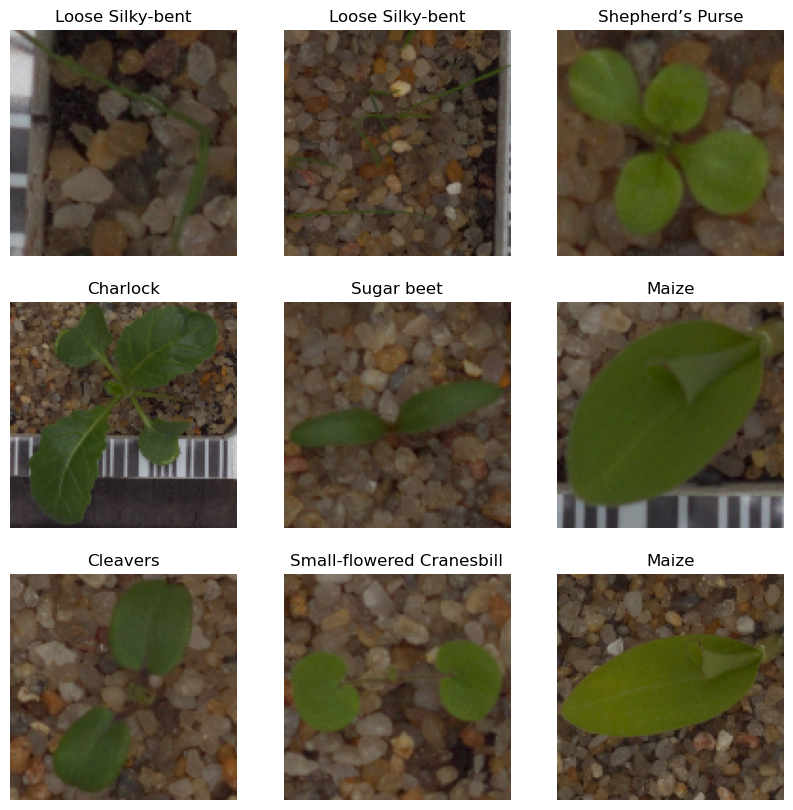

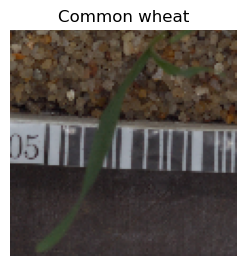

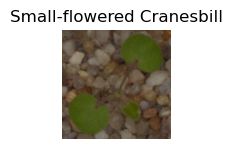

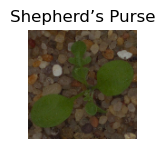

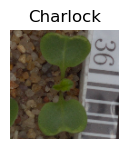

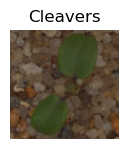

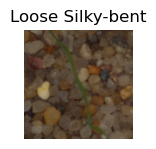

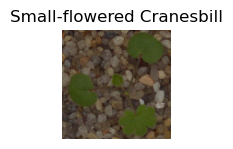

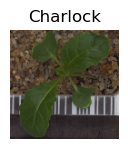

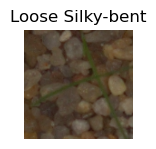

In [61]:
plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")
    plt.show()

In [63]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [64]:
input_shape = (120,120,3)
num_classes = 12
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [65]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
epochs = 20
batch_size = 32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
139/139 [==============================] - 319s 2s/step - loss: 2.9156 - accuracy: 0.4946 - val_loss: 8.9140 - val_accuracy: 0.1355
Epoch 2/20
139/139 [==============================] - 374s 3s/step - loss: 0.7950 - accuracy: 0.7545 - val_loss: 9.8205 - val_accuracy: 0.1653
Epoch 3/20
139/139 [==============================] - 393s 3s/step - loss: 0.4908 - accuracy: 0.8382 - val_loss: 14.2172 - val_accuracy: 0.1472
Epoch 4/20
139/139 [==============================] - 407s 3s/step - loss: 0.3283 - accuracy: 0.8892 - val_loss: 1.7239 - val_accuracy: 0.6134
Epoch 5/20
139/139 [==============================] - 411s 3s/step - loss: 0.3210 - accuracy: 0.8987 - val_loss: 1.3745 - val_accuracy: 0.7236
Epoch 6/20
139/139 [==============================] - 412s 3s/step - loss: 0.1400 - accuracy: 0.9519 - val_loss: 2.9790 - val_accuracy: 0.5474
Epoch 7/20
139/139 [==============================] - 2174s 16s/step - loss: 0.0762 - accuracy: 0.9731 - val_loss: 2.2072 - val_accuracy: 0.6

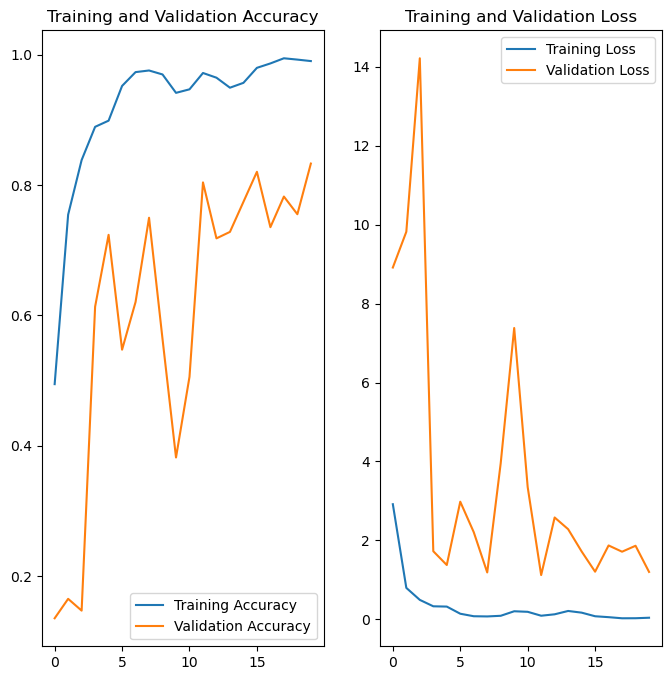

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()